# HoT69 Machine Learning
This is some sample text!


Introduktion till AI, Machine Learning och Deep Learning


## Artificial Intelligence (AI)
John McCarthy myntade begreppet 1956.
"Maskiner som kan utföra uppgifter som karaktäriseras av mänsklig intelligens."
- Planering
- Förstå språk
- Känna igen objekt och ljud
- Lära sig
- Problemlösning


## Machine Learning (ML)
the ability to learn without being explicitly programmed.
A way to created AI.

## Artificial Neural Networks (ANN) and Deep Learning
Artificial Neural Networks är en approach till Machine Learning där man tagit inspriration från hur den mänskliga hjärnan fungerar.

Deep Learning är djupa neural nät.

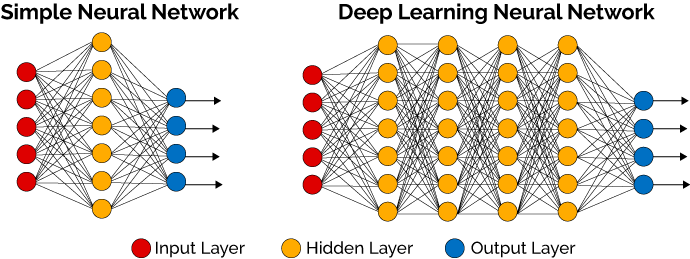
Picture by Anna Gomez http://www.global-engage.com/life-science/deep-learning-in-digital-pathology/


Importera lite bra bibliotek
- Numpy för kunna jobba smidigt med arrays
- matplotlib för att kunna skapa snygga grafer

In [3]:
import numpy as np
import matplotlib.pyplot as plt



Vi behöver data att träna vårat program på. Så vi skapar två vektorer.


In [4]:
np.random.seed(0)                                            #To generate same data each run
X = 100 * np.random.rand(100) + 20                           # Array of 100 random numbers in range [0..100]
Y = abs(0.025 * X + 0.005 * np.random.randn(100) * X) + 0.3  # Genereate array with sales prices including noise

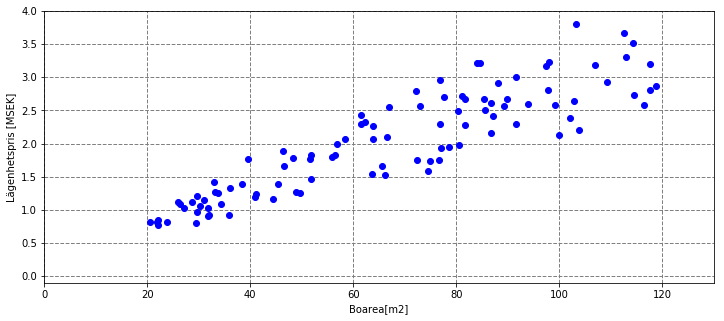

In [5]:
plt.rcParams['figure.figsize'] = (12,5)
plt.plot(X, Y, 'bo')
plt.axis([0, 130, -0.1, 4])
plt.rcParams['figure.dpi'] = 100
plt.xlabel('Boarea[m2]')
plt.ylabel('Lägenhetspris [MSEK]')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.show()

Räta linjens ekvation y = k*x + m

Vår hypotes: $ h_{k}(x) = k*x $

Vi sätter k = 0 som utgångspunkt.

In [6]:
k = 0          # Initial value of k
alpha = 0.0001 # Learning rate
m = 100        # Number of epochs

for i in range(0,10):
    k = k - alpha * 1/m * np.dot(np.multiply(k, X) - Y   , np.transpose(X))
    
print("K = ", k)

K =  0.0295509139442


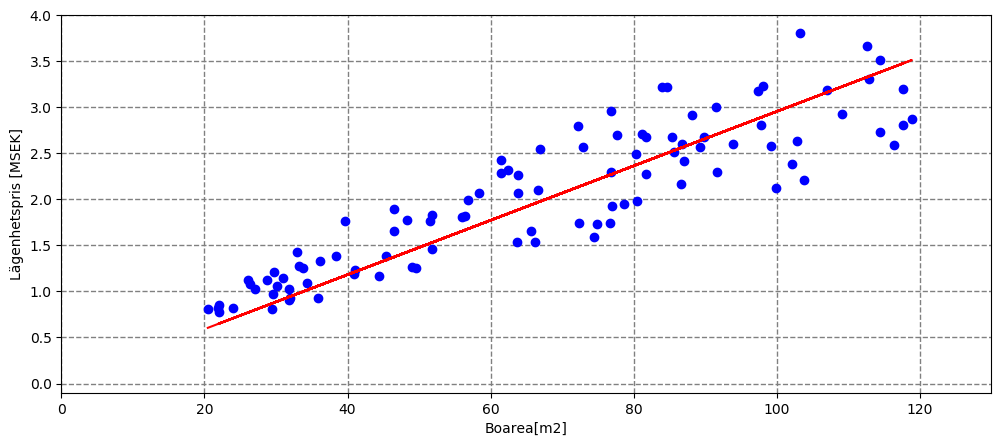

In [7]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12,5)
y_hat = X * k
plt.plot(X, Y, 'bo', X, y_hat, 'r-')
plt.axis([0, 130, -0.1, 4])
plt.xlabel('Boarea[m2]')
plt.ylabel('Lägenhetspris [MSEK]')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.show()

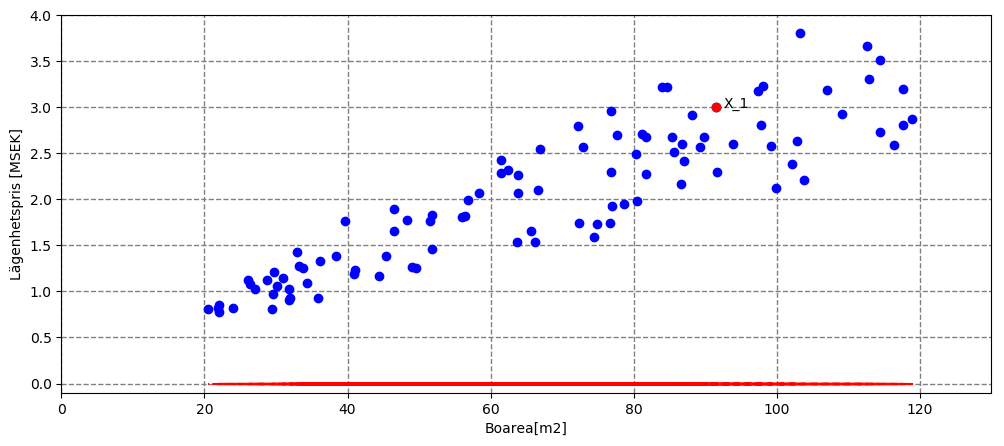

In [8]:
k = 0

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12,5)
y_hat = X * k
plt.plot(X, Y, 'bo', X, y_hat, 'r--', X[1], Y[1], 'ro')
plt.axis([0, 130, -0.1, 4])
plt.xlabel('Boarea[m2]')
plt.ylabel('Lägenhetspris [MSEK]')
plt.annotate('X_1', xy=(X[1],Y[1]), xytext=(X[1] + 1,Y[1]))
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.show()

## Cost function
För att kunna utvärdera hur bra vår algoritm är på att förutså Lägenhetspriset givet Boarea så skapar vi en function som mäter hur fel den har. 

Absolut vanligaste sättet att mäta detta är för linear regression är att ta medelvärdet av det kvadratiska felet.

Börjar med att kolla på en enskild punkt $X_1$.

$X_1$ har värde ~92 m²

Enligt vår hypotes parametersatt med k = 0 så gissar den att $ \hat{y}_1$  är

$ \hat{y}_1 = h_k(x_1) =  k * x_1 = 0 * x_1 = 0 $

$Y_1$ har värde ~3 MSEK

Det kvadrerade felet blir

$ (h_k(x^i) - y^i)² = (0 - 3)² = 9$

Om man summerar över alla våra exempel (datapunkter) så får man


$ J(k) = \frac{1}{2m}\sum_{i=0}^{m}(h_k(x^i) - y^i)² $


In [9]:
def costFunction(X, k, Y):
    cost = sum((np.multiply(k, X) - Y)**2)
    return cost


In [10]:
print(costFunction(X, k, Y))

483.052635886


In [11]:
k_array = np.arange(0, .06, 0.001)
print(k_array)


[ 0.     0.001  0.002  0.003  0.004  0.005  0.006  0.007  0.008  0.009
  0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
  0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
  0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
  0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
  0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059]


In [12]:
cost_array = np.zeros(np.size(k_array))
for i in range(0, k_array.size):
    cost_array[i] = costFunction(X, k_array[i], Y)

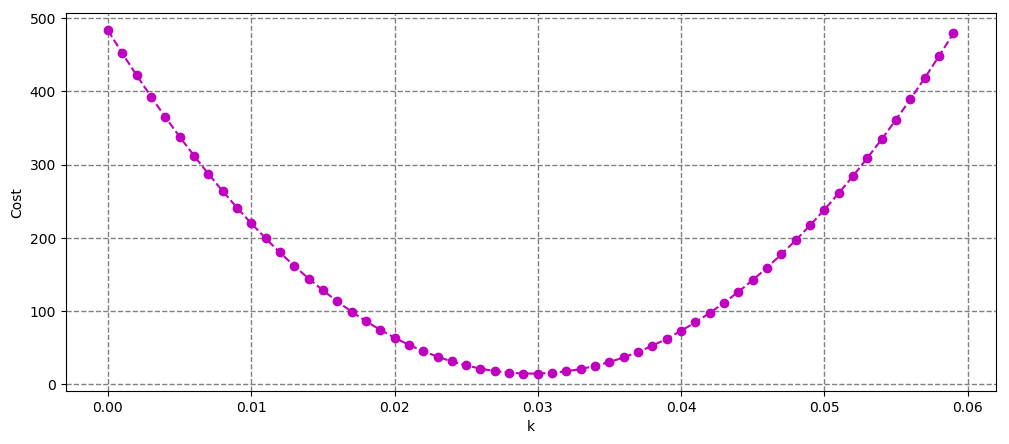

In [13]:
plt.plot(k_array, cost_array, 'mo--')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12,5)
plt.xlabel('k')
plt.ylabel('Cost')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.show()

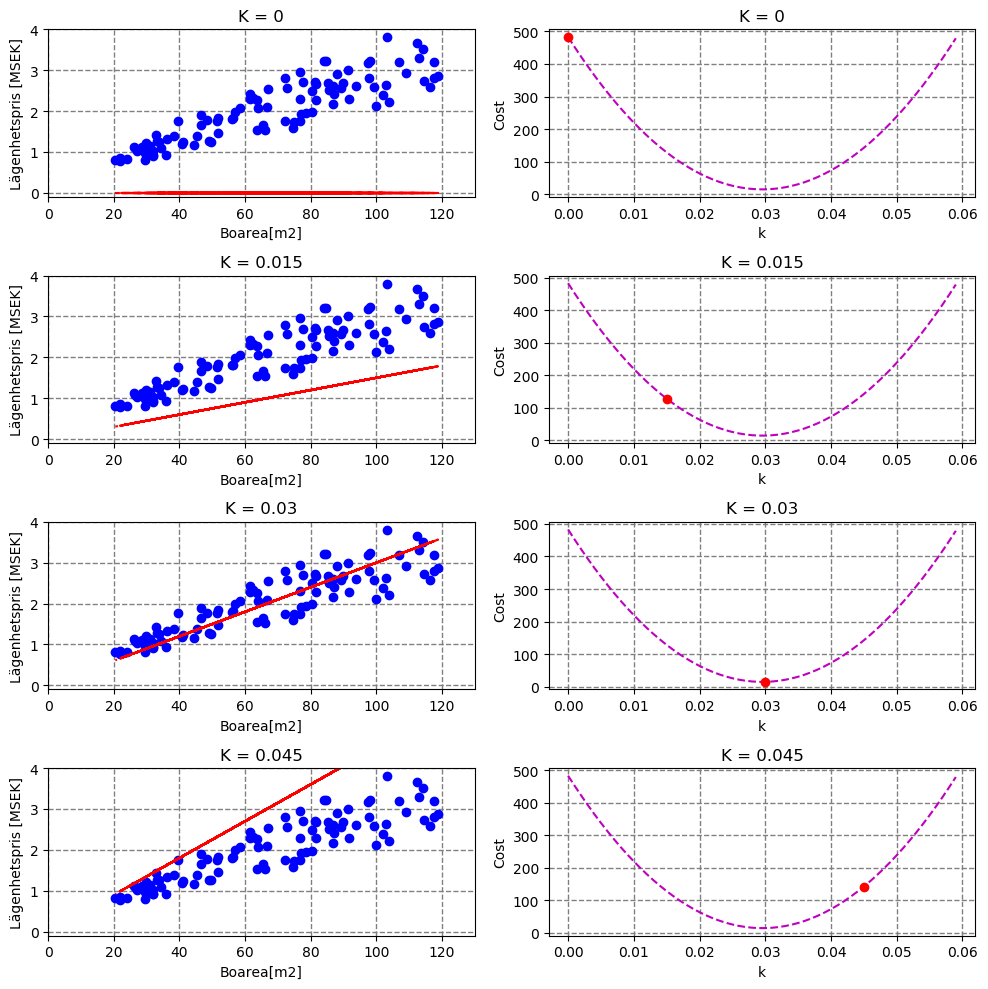

In [14]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (10,10)

plt.subplot(4, 2, 1)
k = 0
y_hat = X * k
plt.title('K = ' + str(k))
plt.plot(X, Y, 'bo', X, y_hat, 'r--')
plt.axis([0, 130, -0.1, 4])
plt.xlabel('Boarea[m2]')
plt.ylabel('Lägenhetspris [MSEK]')
plt.grid(color='grey', linestyle='--', linewidth=1)

plt.subplot(4, 2, 2)
plt.title('K = ' + str(k))
plt.plot(k_array, cost_array, 'm--', k_array[0], cost_array[0], 'ro')
plt.xlabel('k')
plt.ylabel('Cost')
plt.grid(color='grey', linestyle='--', linewidth=1)



plt.subplot(4, 2, 3)
k = 0.015
y_hat = X * k
plt.title('K = ' + str(k))
plt.plot(X, Y, 'bo', X, y_hat, 'r--')
plt.axis([0, 130, -0.1, 4])
plt.xlabel('Boarea[m2]')
plt.ylabel('Lägenhetspris [MSEK]')
plt.grid(color='grey', linestyle='--', linewidth=1)

plt.subplot(4, 2, 4)
plt.title('K = ' + str(k))
plt.plot(k_array, cost_array, 'm--', k_array[15], cost_array[15], 'ro')
plt.xlabel('k')
plt.ylabel('Cost')
plt.grid(color='grey', linestyle='--', linewidth=1)



plt.subplot(4, 2, 5)
k = 0.03
y_hat = X * k
plt.title('K = ' + str(k))
plt.plot(X, Y, 'bo', X, y_hat, 'r--')
plt.axis([0, 130, -0.1, 4])
plt.xlabel('Boarea[m2]')
plt.ylabel('Lägenhetspris [MSEK]')
plt.grid(color='grey', linestyle='--', linewidth=1)

plt.subplot(4, 2, 6)
plt.title('K = ' + str(k))
plt.plot(k_array, cost_array, 'm--', k_array[30], cost_array[30], 'ro')
plt.xlabel('k')
plt.ylabel('Cost')
plt.grid(color='grey', linestyle='--', linewidth=1)



plt.subplot(4, 2, 7)
k = 0.045
y_hat = X * k
plt.title('K = ' + str(k))
plt.plot(X, Y, 'bo', X, y_hat, 'r--')
plt.axis([0, 130, -0.1, 4])
plt.xlabel('Boarea[m2]')
plt.ylabel('Lägenhetspris [MSEK]')
plt.grid(color='grey', linestyle='--', linewidth=1)

plt.subplot(4, 2, 8)
plt.title('K = ' + str(k))
plt.plot(k_array, cost_array, 'm--', k_array[45], cost_array[45], 'ro')
plt.xlabel('k')
plt.ylabel('Cost')
plt.grid(color='grey', linestyle='--', linewidth=1)



plt.tight_layout()
plt.show()

# Träna våran modell

För att räkna ut derivatan på kostnadsfunktionen.

Kvadratiska felet i en punkt x är
Kvadratiska_felet = (våran_gissning(ŷ) - faktiska_värdet(y))².
ŷ = k * x
--> Kvadratiska felet = (k * x - y)²

Vår konstnadsfunktion
$ J(k) = \frac{1}{2m}\sum_{i=0}^{m}(h_k(x^i) - y^i)² $,  där $h_k(x^i) = k *x^i$

$ J(k) = \frac{1}{2m}\sum_{i=0}^{m}(k * x^i - y^i)² = \frac{1}{2m}*((k * x^1 - y^1)² + (k * x^1 - y^1)² + .. + (k * x^m - y^m))²$

Derivatan av kostfunktionen
$ \frac{\delta}{\delta k}J(k) = \frac{1}{m}\sum_{i=0}^{m}((h_k(x^i) - y^i) * x^i$

$ k = k - alpha * \frac{1}{m}\sum_{i=0}^{m}((h_k(x^i) - y^i) * x^i $

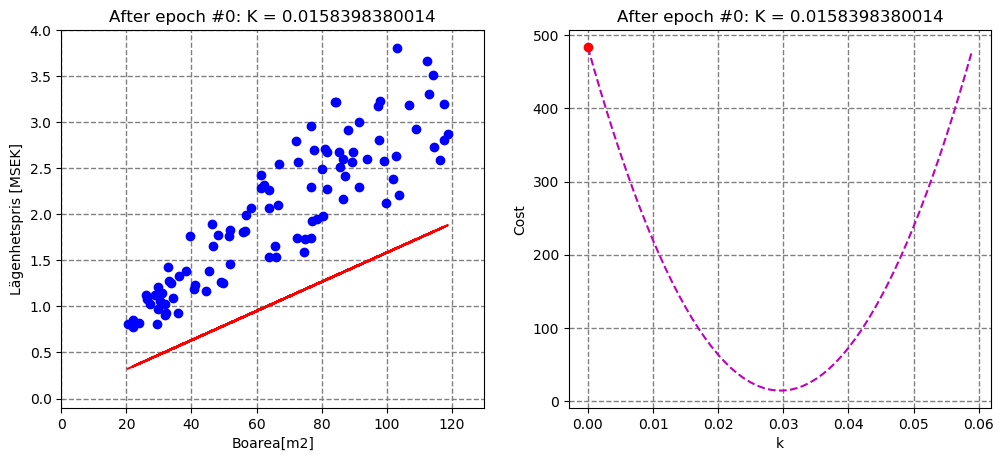

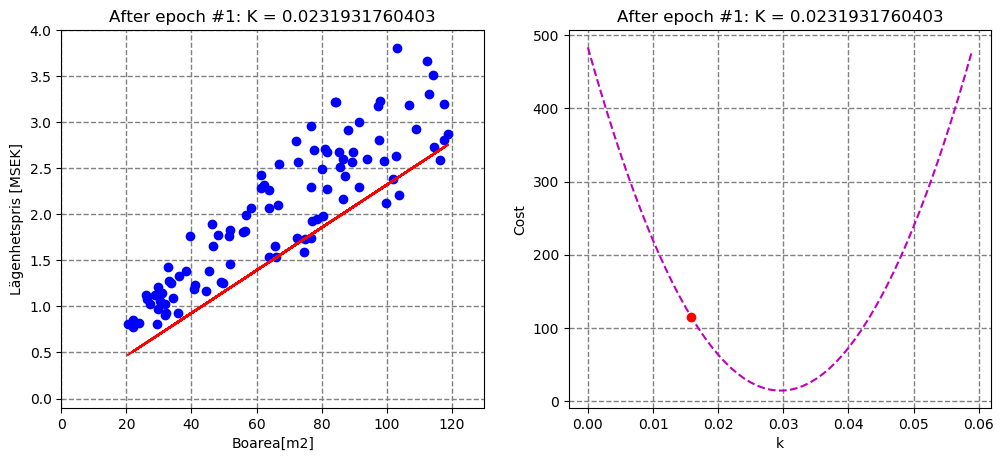

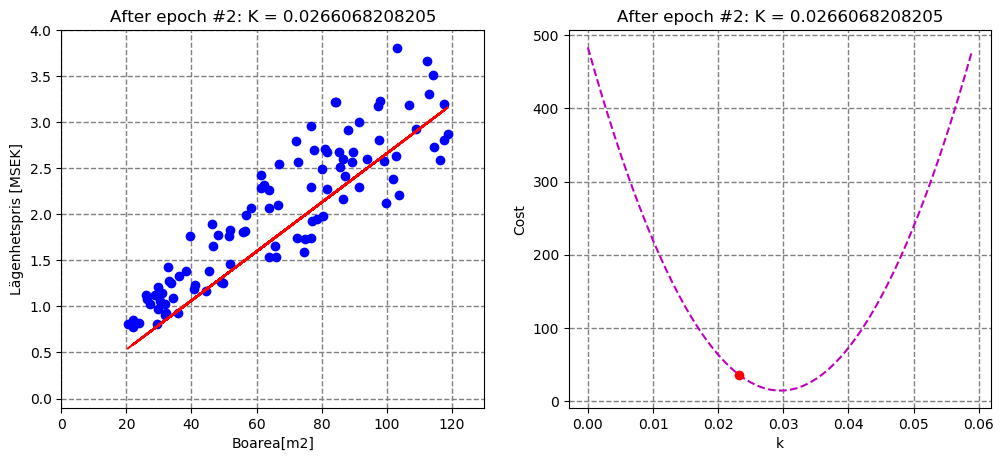

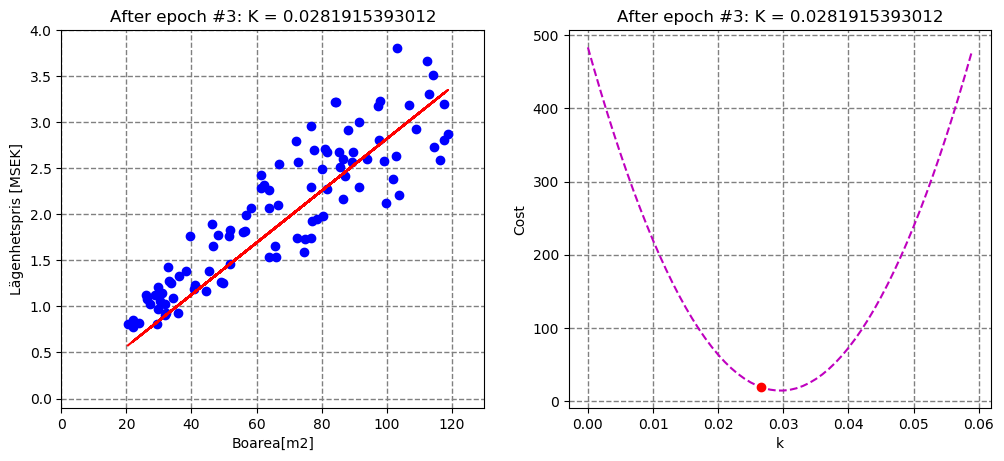

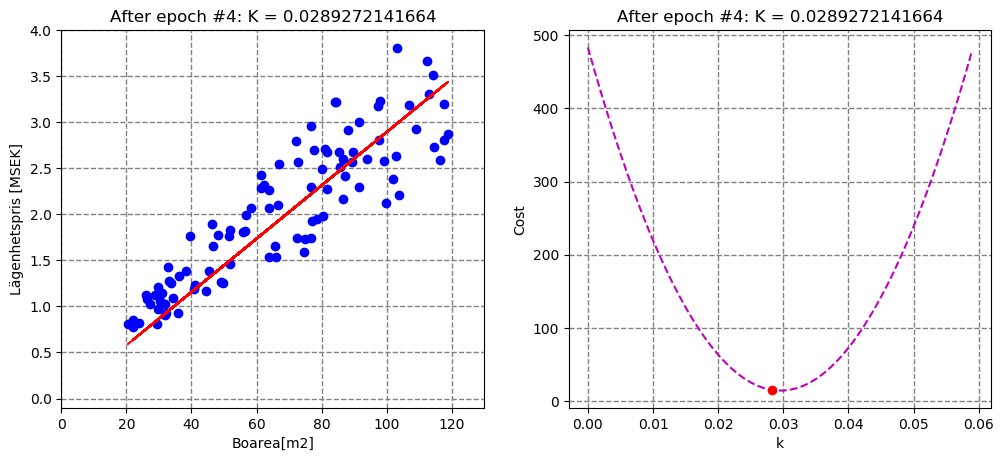

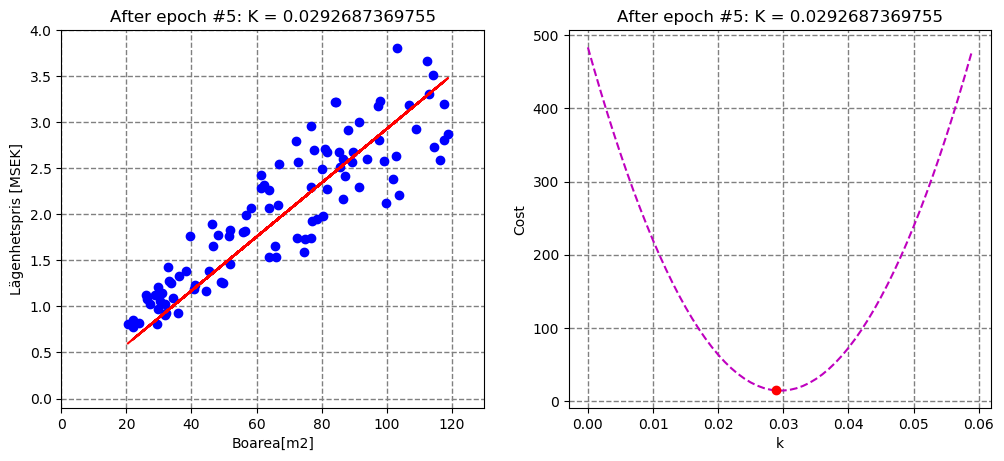

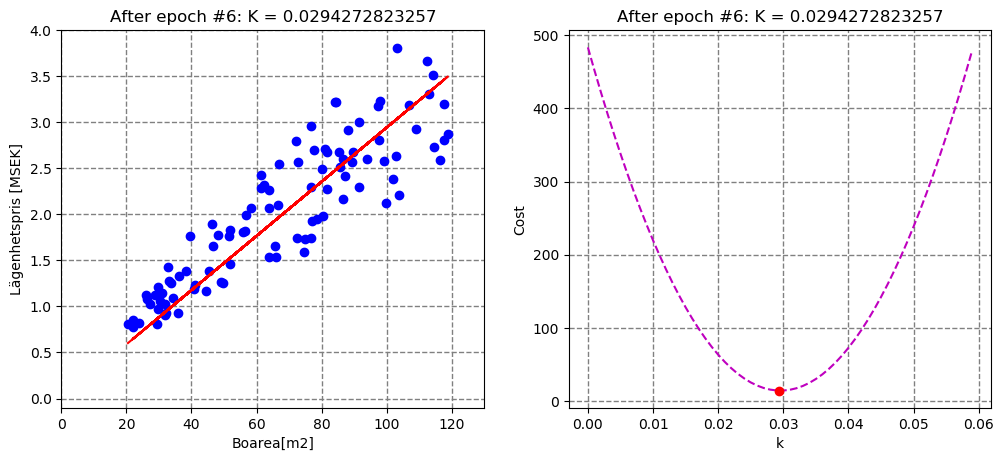

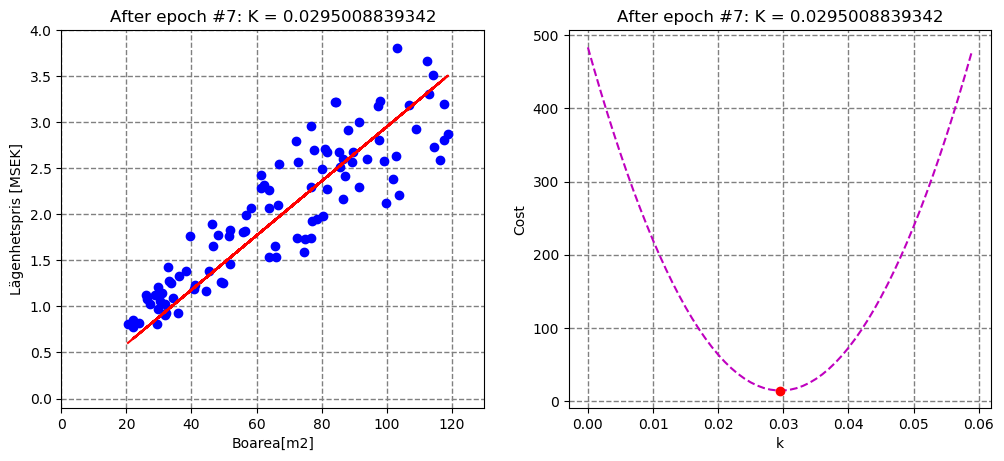

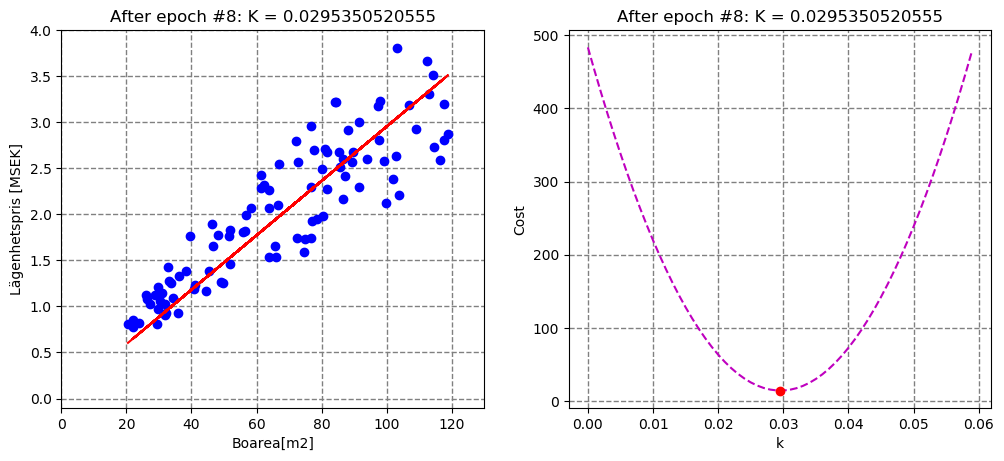

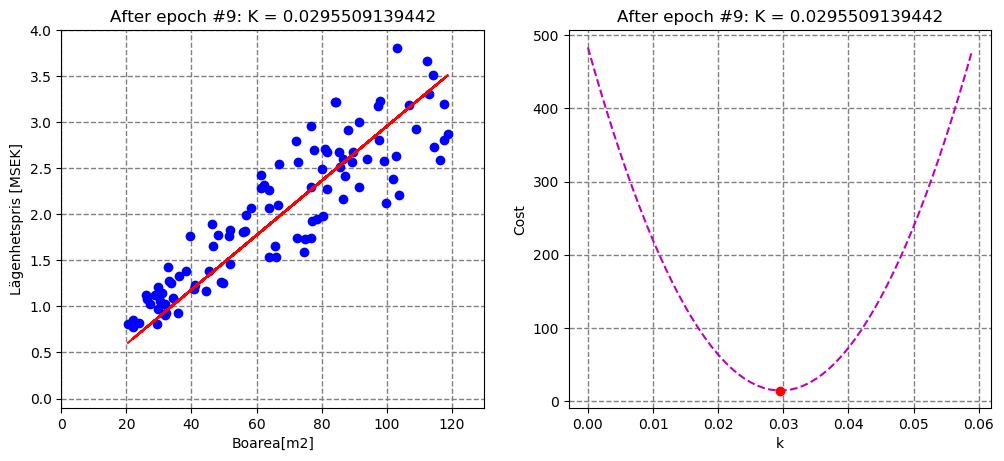

K =  0.0295509139442


In [31]:
alpha = 0.0001
k = 0
m = 100
kHistory = []
kHistory.append(0)
costHistory = []
costHistory.append(costFunction(X, 0, Y))

for i in range(0,10):
    k = k - alpha * 1/m * np.dot(np.multiply(k, X) - Y   , np.transpose(X))
    kHistory.append(k)
    costHistory.append(costFunction(X, k, Y))
    
    plt.subplot(1, 2, 1)
    plt.title('After epoch #' + str(i) +': K = ' + str(k))
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = (12,5)
    y_hat = X * k
    plt.plot(X, Y, 'bo', X, y_hat, 'r-')
    plt.axis([0, 130, -0.1, 4])
    plt.xlabel('Boarea[m2]')
    plt.ylabel('Lägenhetspris [MSEK]')
    plt.grid(color='grey', linestyle='--', linewidth=1)
    
    plt.subplot(1, 2, 2)
    plt.title('After epoch #' + str(i) +': K = ' + str(k))
    plt.plot(k_array, cost_array, 'm--', kHistory[i], costHistory[i], 'ro')
    plt.xlabel('k')
    plt.ylabel('Cost')
    plt.grid(color='grey', linestyle='--', linewidth=1)

    plt.show()
    
print("K = ", k)

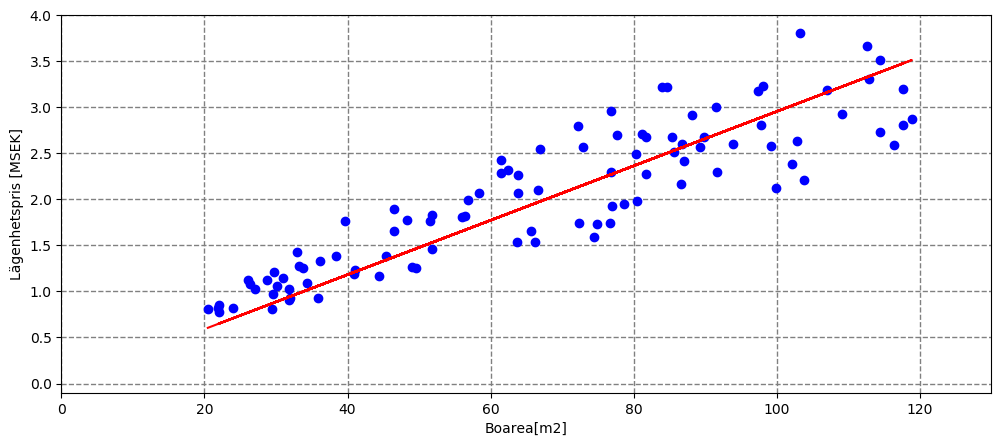

In [24]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12,5)
y_hat = X * k
plt.plot(X, Y, 'bo', X, y_hat, 'r-')
plt.axis([0, 130, -0.1, 4])
plt.xlabel('Boarea[m2]')
plt.ylabel('Lägenhetspris [MSEK]')
plt.grid(color='grey', linestyle='--', linewidth=1)
plt.show()

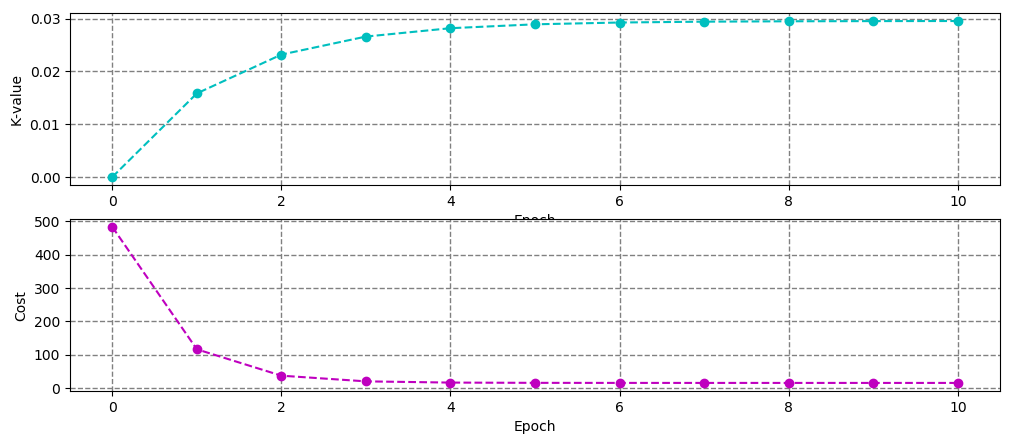

In [25]:
epochs = np.arange(0,np.size(kHistory))

plt.subplot(2,1,1)
plt.plot(epochs, kHistory, 'co--')
plt.xlabel('Epoch')
plt.ylabel('K-value')
plt.grid(color='grey', linestyle='--', linewidth=1)

plt.subplot(2,1,2)
plt.plot(epochs, costHistory, 'mo--')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.grid(color='grey', linestyle='--', linewidth=1)

plt.show()